<a href="https://colab.research.google.com/github/sturu1/Mon-AM/blob/master/2020_07_27_%EC%98%A4%EC%A0%84%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Funtional API를 사용하기 위한 기본 Setup
외워야함. 익히면 편함

https://chloevan.github.io/python/tensorflow2.0/ch8_2_transfer_learning/

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#sequential 을 Funtional로 바꿀수잇어야함
#shape (32, 32, 3) (x, y , 채널)
#784는 28 * 28 을 펼쳐  놓은것
#funtional은 input 데이터 모양은 정해져야한다. 
#epoch는 책1권, batch_size는 1단원, Dense ,  중간층엔 activation 이  ,출력 activation 은  

(None, 784) <dtype: 'float32'>
Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


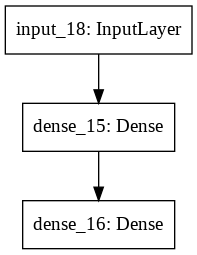

In [29]:
#Funtional API를 사용하려면 
#우선  input node를 항상 먼저 설정해줘야한다.
inputs = keras.Input(shape=(784, ))#입력노드
print(inputs.shape, inputs.dtype)

dense = layers.Dense(64, activation='relu')#은닉층노드
x = dense(inputs)
outputs = layers.Dense(10)(x)#출력노드
#=======그래프모델이 정의됨

model = keras.Model(inputs = inputs, outputs = outputs, name = 'mnist_model')#처음inputs , outputs는 변수이다. 뒤에꺼는 입력노드, 출력노드이다.
model.summary()

keras.utils.plot_model(model, "my_first_model.png")#그래프로 가시화

# 트레이닝, 평가, 추론

1. 트레이닝, 평가, 추론 작업은 Sequential 모델링 방법과 동일하게 사용가능
2. MNIST로딩, 벡터 reshape, 모델fit, evaluation순이다.

In [30]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = keras.optimizers.RMSprop(),
              metrics = ["accuracy"])

history = model.fit(x_train, y_train, batch_size = 64, epochs = 2, validation_split = 0.2)

test_scores = model.evaluate(x_test, y_test, verbose = 2)
print("test loss", test_scores[0])
print("test accuracy", test_scores[1])

Epoch 1/2
750/750 [==============================] - 2s 3ms/step - loss: 0.3742 - accuracy: 0.8959 - val_loss: 0.2130 - val_accuracy: 0.9388
Epoch 2/2
750/750 [==============================] - 2s 2ms/step - loss: 0.1921 - accuracy: 0.9445 - val_loss: 0.1626 - val_accuracy: 0.9529
313/313 - 0s - loss: 0.1638 - accuracy: 0.9533
test loss 0.16380411386489868
test accuracy 0.9532999992370605


# 모델 저장(save) 및 직렬화(serialize)

1. 저장된 파일은 아래와 같은 정보들로 저장됨
*  model architecture
*  model weight values
*  model training config
*  optimizer and its state 

In [31]:
model.save("path_to_my_model")

model = keras.models.load_model("path_to_my_model")

model.summary()

INFO:tensorflow:Assets written to: path_to_my_model/assets
Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# 여러개의 모델정의를 위해 같은 그래프레이어 사용하기

* 전체 오토인코더 모델에서 인코더 모델과 오토인코더모델 두 개의 모델 생성해보기

In [33]:
encoder_input = keras.Input(shape = (28, 28, 1), name = "img")
x = layers.Conv2D(16, 3, activation = 'relu')(encoder_input)
x = layers.Conv2D(32, 3, activation = 'relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation = 'relu')(x)
x = layers.Conv2D(16, 3, activation = 'relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)
#model1
encoder = keras.Model(encoder_input, encoder_output, name = "encoder")

encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation =  'relu')(x)
x = layers.Conv2DTranspose(32, 3, activation =  'relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation =  'relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation = 'relu')(x)

#model2
autoencoder = keras.Model(encoder_input, decoder_output, name = "autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   